In [1]:
import sys

sys.path.append('../')

from fuzzy_system import *

%load_ext autoreload
%autoreload 2
%matplotlib widget

# Create Some Fuzzy Variables


In [2]:
xcrispset = CrispSet({("x", make_continuousSet((0, 4.25)))})
x = LinguisticVariable(xcrispset)

x.add_linguistic_term(Sigmoid("smaller3", 3, -5))
x.add_linguistic_term(Sigmoid("greater3", 3, 5))

x.add_linguistic_term(Sigmoid("smaller2", 2, -5))
x.add_linguistic_term(Sigmoid("greater2", 2, 5))

x.add_linguistic_term(Sigmoid("smaller1", 1, -5))
x.add_linguistic_term(Sigmoid("greater1", 1, 5))

In [3]:
ycrispset = CrispSet({("y", make_continuousSet((0, 3.25)))})
y = LinguisticVariable(ycrispset)

y.add_linguistic_term(Sigmoid("smaller2", 2, -5))
y.add_linguistic_term(Sigmoid("greater2", 2, 5))

y.add_linguistic_term(Sigmoid("smaller1", 1, -5))
y.add_linguistic_term(Sigmoid("greater1", 1, 5))

In [4]:
resultcrispset = CrispSet({("Class", make_continuousSet((0, 4)))})
cls = LinguisticVariable(resultcrispset)

cls.add_linguistic_term(Gaussian("1", 1, 0.25))
cls.add_linguistic_term(Gaussian("2", 2, 0.25))
cls.add_linguistic_term(Gaussian("3", 3, 0.25))

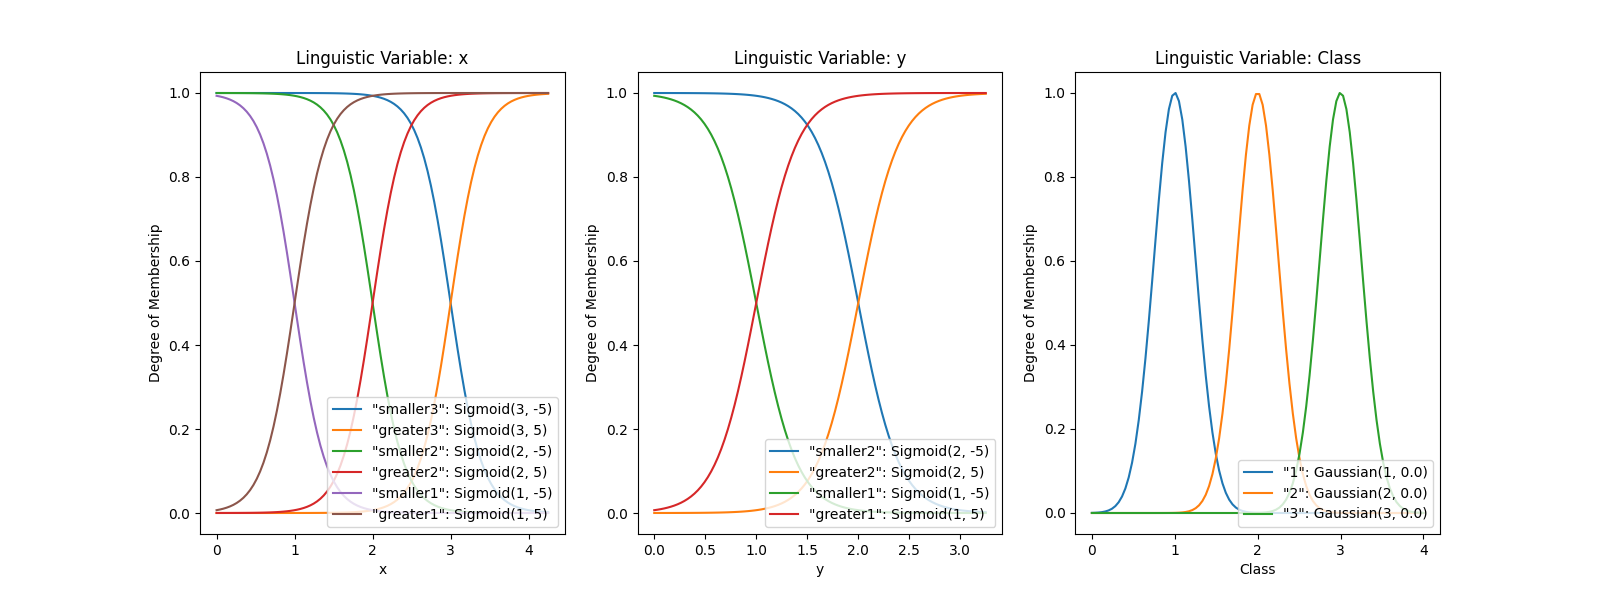

In [5]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(16, 6)

x.plot(ax[0])
y.plot(ax[1])
cls.plot(ax[2])

plt.show()

fig.suptitle("Linguistic Variables")

fig.savefig("fuzzy_sets.png", dpi=300)

# Plot Rule Input


In [6]:
rule1 = FuzzyRule(((x == "smaller3") & (y == "smaller2"))
                  & (x == "smaller2"), cls == "1")
rule2 = FuzzyRule(((x == "smaller3") & (y == "smaller2"))
                  & (x == "greater2"), cls == "2")

rule3 = FuzzyRule(((x == "smaller3") & (y == "greater2"))
                  & (x == "smaller1"), cls == "2")
rule4 = FuzzyRule(((x == "smaller3") & (y == "greater2"))
                  & (x == "greater1"), cls == "1")

rule5 = FuzzyRule(((x == "greater3") & (y == "smaller1")),
                  cls == "1")
rule6 = FuzzyRule(((x == "greater3") & (y == "greater1")),
                  cls == "3")

# Resulting System


In [7]:
fs = FuzzySystem()

fs.add_rule(rule1)
fs.add_rule(rule2)
fs.add_rule(rule3)
fs.add_rule(rule4)
fs.add_rule(rule5)
fs.add_rule(rule6)

fs

FuzzySystem: Class
FuzzyRule(
  IF	 "("("smaller3": Sigmoid(3, -5) and "smaller2": Sigmoid(2, -5))" and "smaller2": Sigmoid(2, -5))"
  THEN	 "1": Gaussian(1, 0.0)
)
FuzzyRule(
  IF	 "("("smaller3": Sigmoid(3, -5) and "smaller2": Sigmoid(2, -5))" and "greater2": Sigmoid(2, 5))"
  THEN	 "2": Gaussian(2, 0.0)
)
FuzzyRule(
  IF	 "("("smaller3": Sigmoid(3, -5) and "greater2": Sigmoid(2, 5))" and "smaller1": Sigmoid(1, -5))"
  THEN	 "2": Gaussian(2, 0.0)
)
FuzzyRule(
  IF	 "("("smaller3": Sigmoid(3, -5) and "greater2": Sigmoid(2, 5))" and "greater1": Sigmoid(1, 5))"
  THEN	 "1": Gaussian(1, 0.0)
)
FuzzyRule(
  IF	 "("greater3": Sigmoid(3, 5) and "smaller1": Sigmoid(1, -5))"
  THEN	 "1": Gaussian(1, 0.0)
)
FuzzyRule(
  IF	 "("greater3": Sigmoid(3, 5) and "greater1": Sigmoid(1, 5))"
  THEN	 "3": Gaussian(3, 0.0)
)

# Plot Fitnes at a specific point


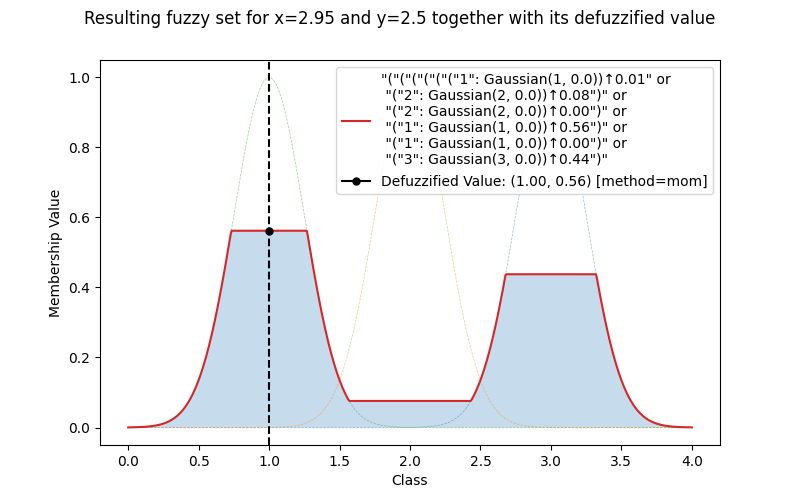

In [8]:
data = {"x": 2.95, "y": 2.5}

rules = fs.applyRules(data)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 5)

rules.plot(ax, n=600)

# add \n in legend before `or`
handles, labels = ax.get_legend_handles_labels()
labels = [f"{'or \n'.join(label.split('or'))}" for label in labels]

# if label consist of single number, add `class` before it
labels = [f"Class {label}" if label.isdigit() else label for label in labels]


ax.legend(handles, labels, loc='upper right')

fig.suptitle(f"Resulting fuzzy set for x={data['x']} and y={
             data['y']} together with its defuzzified value")

fig.savefig("fuzzy_set_for_data_mom.png", dpi=300)

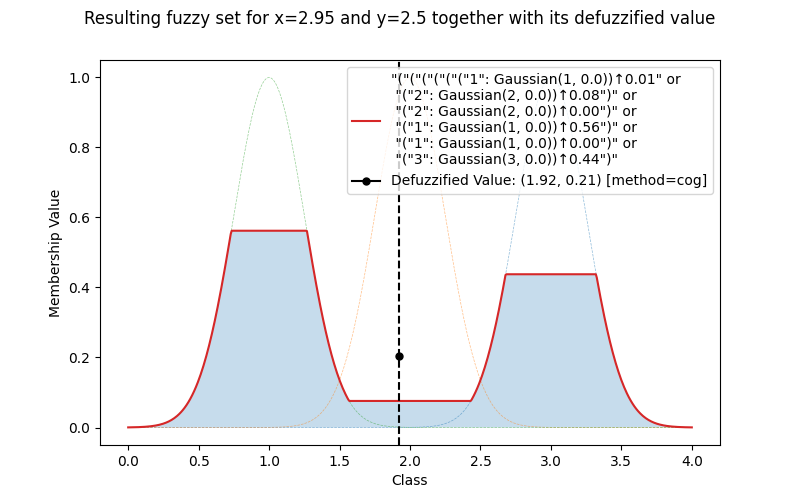

In [9]:
data = {"x": 2.95, "y": 2.5}

rules = fs.applyRules(data)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 5)

rules.plot(ax, n=600, defuzzifiationMethod="cog")

# add \n in legend before `or`
handles, labels = ax.get_legend_handles_labels()
labels = [f"{'or \n'.join(label.split('or'))}" for label in labels]


ax.legend(handles, labels, loc='upper right')

fig.suptitle(f"Resulting fuzzy set for x={data['x']} and y={
             data['y']} together with its defuzzified value")

fig.savefig("fuzzy_set_for_data_cog.png", dpi=300)

# Plot Decision Surface


In [10]:
def plot(X, Y, Z):
    fig, axs = plt.subplots(1)
    axs.set_xlabel("x")
    axs.set_ylabel("y")

    # xlabes only integers
    axs.set_xticks(np.arange(0, 5.5, 0.5))
    axs.set_yticks(np.arange(0, 4.5, 0.5))

    # label positions at end of axis
    axs.xaxis.set_label_coords(0.95, -0.1)
    axs.yaxis.set_label_coords(-0.1, 0.95)

    # y label rotated
    axs.yaxis.label.set_rotation(0)

    my_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        "", ["blue", "red", "green"])

    countour = axs.contourf(X, Y, Z, levels=100,
                            cmap=my_cmap, extend='both')

    CS = axs.contour(X, Y, Z, levels=[1.5, 2.5],
                     linestyles='dashed', colors='black')
    axs.clabel(CS, inline=True, fontsize=12, colors='black')

    cbar = fig.colorbar(countour, ax=axs)
    cbar.set_label("Class")
    cbar.set_ticks([1, 2, 3])

    return fig

In [11]:
X = np.linspace(0, 4, 50)
Y = np.linspace(0, 3, 50)

In [12]:
Z_mom = np.array(
    [[fs.predict({"x": x, "y": y}, method="mom") for x in X] for y in Y])

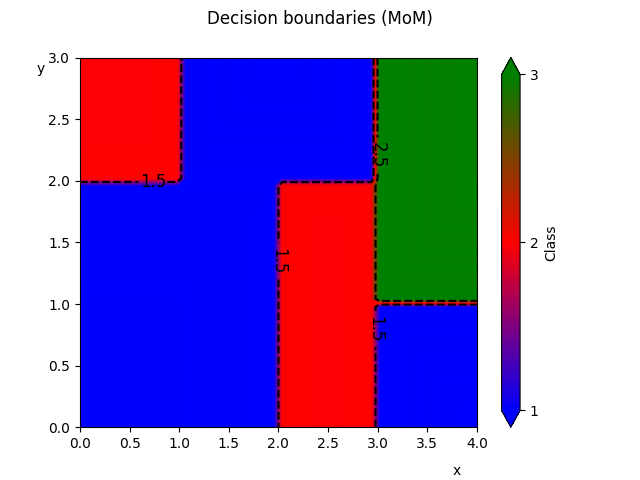

In [13]:
fig_mom = plot(X, Y, Z_mom)

fig_mom.suptitle("Decision boundaries (MoM)")

fig_mom.savefig("fuzzy_system_mom.png", dpi=300)

In [14]:
Z_cog = np.array(
    [[fs.predict({"x": x, "y": y}, method="cog") for x in X] for y in Y])

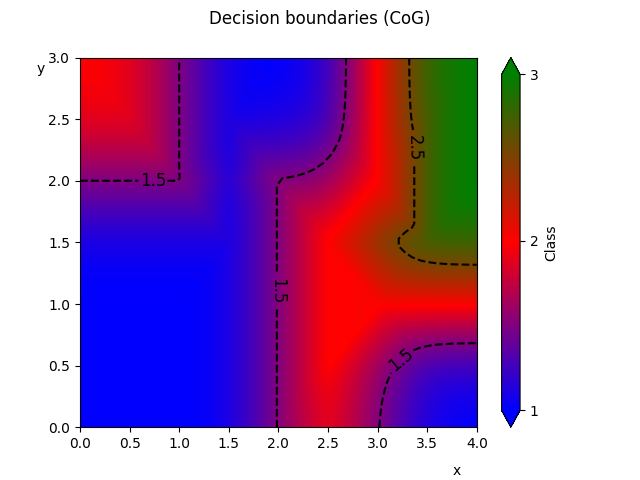

In [15]:
fig_cog = plot(X, Y, Z_cog);

fig_cog.suptitle("Decision boundaries (CoG)")

fig_cog.savefig("fuzzy_system_cog.png", dpi=300)